In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

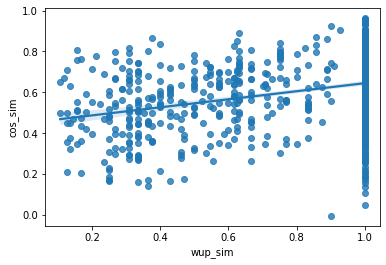

In [71]:
# we have correlations, but we want to know if the relationships are monotonic or linear so we have to look at a scatter
df = pd.read_csv('../results/debug_semcor_pairwise_data_model.plsr.buchanan.allbuthomonyms.5k.300components.500max_iters.csv')


dfSample = df.sample(1000, weights='wup_sim') # This is the importante line
xdataSample, ydataSample = dfSample["cos_sim"], dfSample["wup_sim"]

sns.regplot(x=ydataSample, y=xdataSample) 
plt.show()

In [ ]:
# I guess it's linear and we should use pearson???

# might be rank order and like increase and then flatten out

In [ ]:
# we have a dataset that looks like this

In [47]:
# buchanan
df = pd.read_csv('../results/debug_semcor_analysis_model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters.csv')

# mcrae
# df = pd.read_csv('results/semcor_analysis_model.plsr.mc_rae_real.5k.100components.500max_iters.csv')
df.head(25)

,Unnamed: 0,word,n,n_senses,polysemy_bin,concreteness_bin,pearson,pearson_p,spearman,spearman_p
0,0,communication,561,3,1,2.0,0.126281,2.732377e-03,0.110671,8.702915e-03
1,1,form,11935,11,5,2.0,0.390445,0.000000e+00,0.364088,0.000000e+00
2,2,language,1378,5,2,1.0,0.013668,6.121968e-01,0.035581,1.868218e-01
3,3,structure,1081,4,1,3.0,0.123796,4.479866e-05,0.090283,2.968210e-03
4,4,reply,45,1,0,2.0,NaN,NaN,NaN,NaN
5,5,mate,36,5,2,3.0,0.733591,3.582204e-07,0.677078,5.769573e-06
6,6,disloyalty,1,1,0,0.0,NaN,NaN,NaN,NaN
7,7,feature,861,3,1,2.0,0.605247,3.581418e-87,0.595977,6.458933e-84
8,8,land,1891,8,3,4.0,0.159189,3.347774e-12,0.197558,4.289351e-18
9,9,use,820,6,2,2.0,0.190902,3.608612e-08,0.155263,7.955208e-06


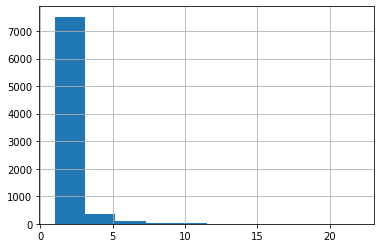

In [48]:
# distribution over number of senses

df["n_senses"].hist();

# closer look at lower freqs

<AxesSubplot:>

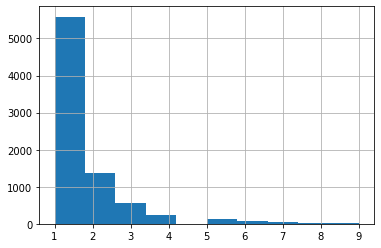

In [8]:
df[df.n_senses < 10].n_senses.hist()

In [66]:
# let's define a function to analyze the data

def average_correlation(data):
    data = data[data['pearson'].notnull() ]
    #data = data[data['n'] > 20 ]
    # only use when we have a confidence value in our analysis
    #data = data[data['pearson_p'] < 0.05] 
    average = np.average(data['pearson'])
    print(average)
    print(len(data))
    print(data.n.sum())
    return average
    #print("Average correlation between wu palmer distance and cosine distance for this model is: ", average)

def analyze_data(data):
    data = data[data['pearson'].notnull() ]
    #data = data[data['n'] > 20 ]
    
    # only use when we have a confidence value in our analysis
    #data = data[data['pearson_p'] < 0.05] 
    
    #data["wn_bin"] = pd.cut(data.n_senses, 
    #                    bins = [0, 2.1, 4.1, 6.1, 8.1, 10.1, 20.1, 50.1, 200], labels = False)
    
    ax = sns.violinplot(x=data['pearson'])
    plt.show()
    ax = sns.violinplot(x=data['polysemy_bin'], y=data['pearson'])
    plt.show()

    data.boxplot(column='pearson', by='polysemy_bin')
    plt.show()
    
    ax = sns.violinplot(x=data['concreteness_bin'], y=data['pearson'])
    plt.show()

    data.boxplot(column='pearson', by='concreteness_bin')
    plt.show()
    
#     plt.scatter(data['n_senses'], data['pearson'])
#     plt.title("Wordnet similarity of homonymous senses plotted against cosine similarity of predicted vectors of two tokens in semantic feature space")
#     plt.xlabel("Number of Senses")
#     plt.ylabel("Cosine Similarity")
#     plt.show()
    
#    print(data)
    
    
    
#analyze_data(df)

In [67]:
# have a look at words which have a low correlation
other = df[df['pearson'].notnull() ]
other = other[other['pearson_p'] < 0.05 ]
other = other[other['pearson'] < 0.1 ]
other.head(10)

,Unnamed: 0,word,n,n_senses,polysemy_bin,concreteness_bin,pearson,pearson_p,spearman,spearman_p
2,2,language,1378,5,2,1.0,-0.079651,3.088613e-03,-0.078023,3.754126e-03
20,20,girl,6903,5,2,4.0,0.071846,2.287965e-09,0.077104,1.412780e-10
23,23,technology,78,2,0,2.0,-0.238051,3.583996e-02,-0.184748,1.053876e-01
27,27,way,13203,11,5,1.0,0.070776,3.891327e-16,0.057481,3.851981e-11
36,36,teeth,378,3,1,4.0,-0.135138,8.519428e-03,-0.144102,4.999610e-03
39,39,job,2926,6,2,2.0,0.094115,3.395355e-07,0.174659,1.783313e-21
40,40,amount,3321,4,1,2.0,0.092441,9.469176e-08,0.153939,4.617174e-19
86,86,day,16290,6,2,3.0,0.079244,4.098651e-24,0.088775,7.238142e-30
107,107,hour,3403,4,1,2.0,0.072766,2.148290e-05,0.117880,5.270757e-12
115,115,audience,820,2,0,3.0,0.089217,1.058860e-02,0.113883,1.087788e-03


In [68]:
# have a look at words which have a high correlation
other = df[df['pearson'].notnull() ]
other = other[other['pearson_p'] < 0.05 ]
other = other[other['pearson'] > 0.9 ]
other.head(10)

# they appear to be words with lots of concrete highly distinguished senses

,Unnamed: 0,word,n,n_senses,polysemy_bin,concreteness_bin,pearson,pearson_p,spearman,spearman_p
204,204,rail,10,2,0,4.0,0.935298,7.087880e-05,0.852803,1.712874e-03
524,524,generator,10,2,0,3.0,0.971442,2.811331e-06,0.852803,1.712874e-03
792,792,fold,6,2,0,3.0,0.913295,1.095081e-02,0.878310,2.131164e-02
795,795,hollow,3,3,1,3.0,0.999836,1.152470e-02,1.000000,0.000000e+00
891,891,eve,36,2,0,2.0,0.932882,1.211170e-16,0.844697,9.383265e-11
914,914,venus,15,2,0,4.0,0.957207,2.251975e-08,0.818317,1.921826e-04
1197,1197,ruler,6,2,0,4.0,0.987001,2.523701e-04,0.878310,2.131164e-02
1273,1273,inclination,6,3,1,1.0,0.941437,5.043974e-03,0.777542,6.872694e-02
1455,1455,polarization,6,2,0,2.0,0.918052,9.798013e-03,0.878310,2.131164e-02
1547,1547,lock,15,2,0,4.0,0.988554,4.600222e-12,0.818317,1.921826e-04


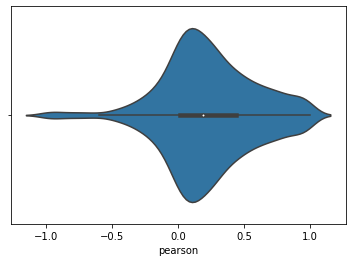

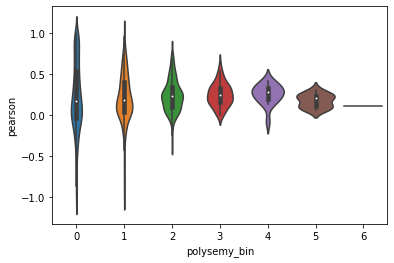

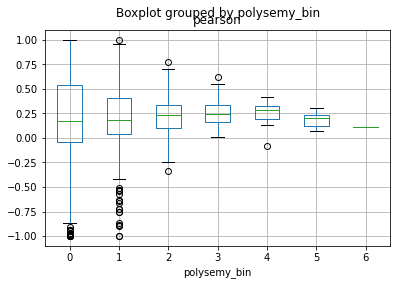

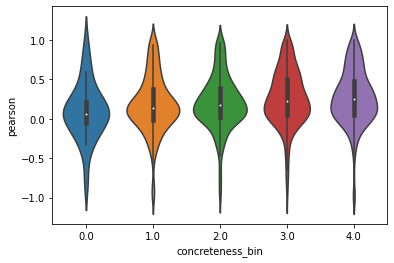

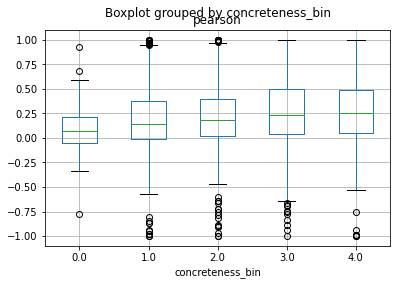

In [69]:
analyze_data(df)

In [53]:
average_correlation(df)

0.5061412246898318

In [54]:
# We have it for 12 different models.

models = [
    ## buchanan
    '../results/debug_semcor_analysis_model.plsr.buchanan.allbuthomonyms.5k.300components.500max_iters',
    '../results/debug_semcor_analysis_model.plsr.buchanan.allbuthomonyms.1k.300components.500max_iters',
    '../results/debug_semcor_analysis_model.ffnn.buchanan.allbuthomonyms.5k.50epochs.0.5dropout.lr1e-4.hsize300',
    '../results/debug_semcor_analysis_model.ffnn.buchanan.allbuthomonyms.1k.50epochs.0.5dropout.lr1e-4.hsize300',
    #'../results/debug_semcor_analysis_model.modabs.buchanan.allbuthomoyms.5k',
    #'../results/debug_semcor_analysis_model.modabs.buchanan.allbuthomoyms.1k',
    ### mcrae
    '../results/debug_semcor_analysis_model.plsr.mc_rae_real.allbuthomonyms.5k.100components.500max_iters',
    '../results/debug_semcor_analysis_model.plsr.mc_rae_real.allbuthomonyms.1k.50components.500max_iters',
    '../results/debug_semcor_analysis_model.ffnn.mc_rae_real.allbuthomonyms.5k.50epochs.0.5dropout.lr1e-4.hsize300',
    '../results/debug_semcor_analysis_model.ffnn.mc_rae_real.allbuthomonyms.1k.50epochs.0.5dropout.lr1e-4.hsize300',
    #### binder
    '../results/debug_semcor_analysis_model.ffnn.binder.5k.50epochs.0.5dropout.lr1e-4.hsize300',
    '../results/debug_semcor_analysis_model.ffnn.binder.1k.50epochs.0.5dropout.lr1e-4.hsize300',
    '../results/debug_semcor_analysis_model.plsr.binder.5k.30components.500max_iters',
    '../results/debug_semcor_analysis_model.plsr.binder.1k.30components.500max_iters',
    ]

****************************************
*** Evaluating ../results/debug_semcor_analysis_model.plsr.buchanan.allbuthomonyms.5k.300components.500max_iters model ***
****************************************


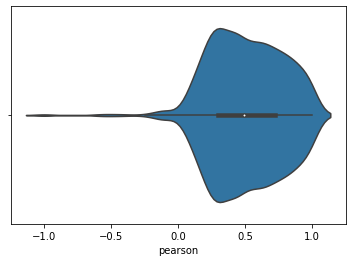

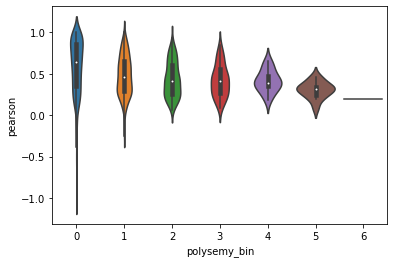

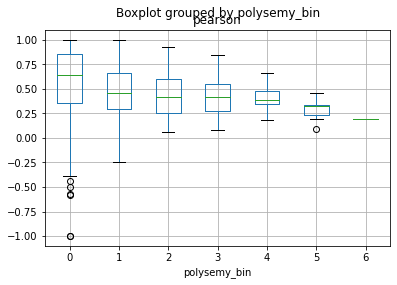

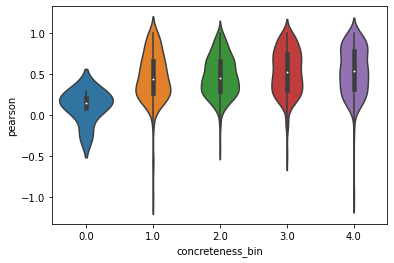

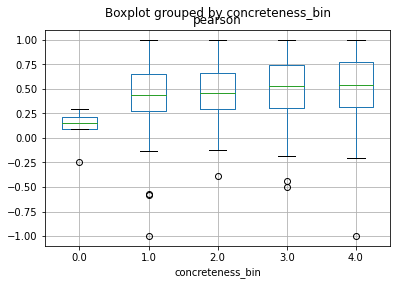


****************************************
*** Evaluating ../results/debug_semcor_analysis_model.plsr.buchanan.allbuthomonyms.1k.300components.500max_iters model ***
****************************************


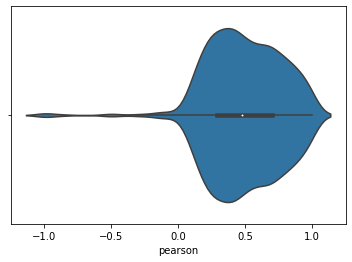

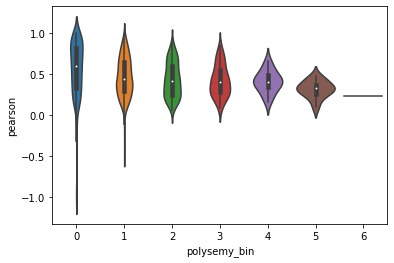

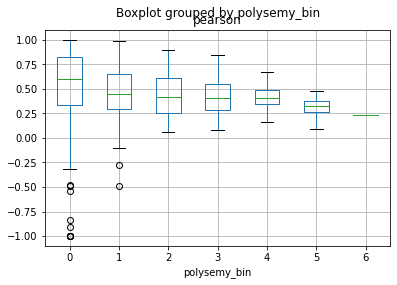

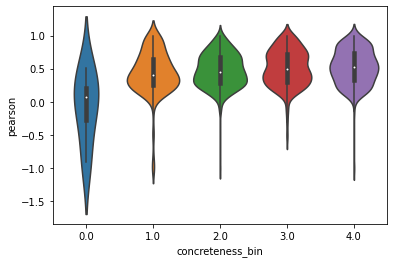

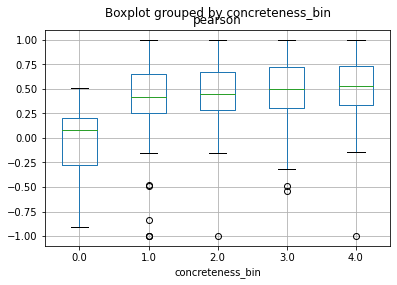


****************************************
*** Evaluating ../results/debug_semcor_analysis_model.ffnn.buchanan.allbuthomonyms.5k.50epochs.0.5dropout.lr1e-4.hsize300 model ***
****************************************


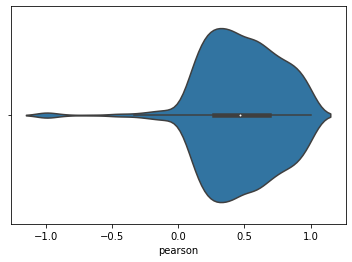

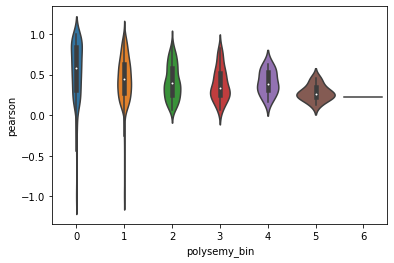

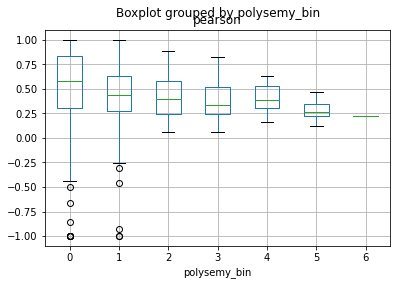

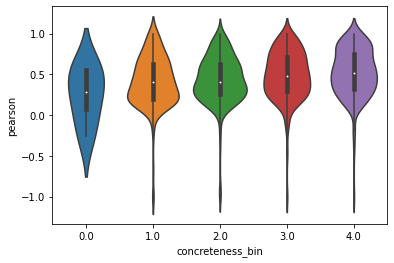

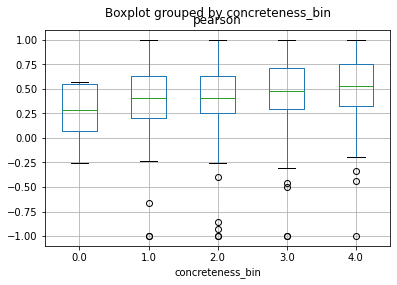


****************************************
*** Evaluating ../results/debug_semcor_analysis_model.ffnn.buchanan.allbuthomonyms.1k.50epochs.0.5dropout.lr1e-4.hsize300 model ***
****************************************


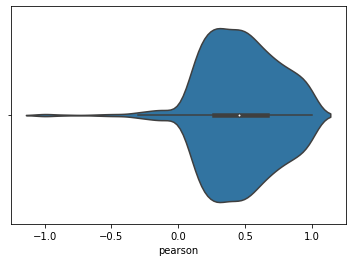

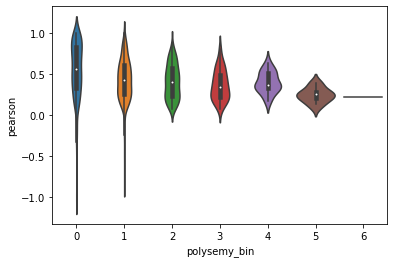

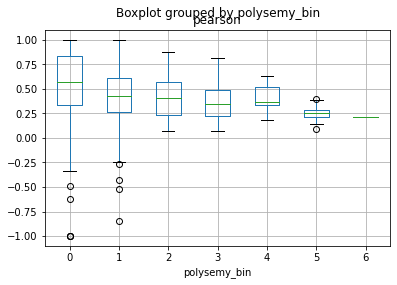

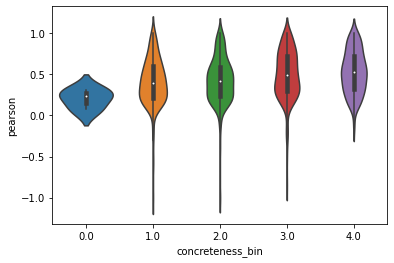

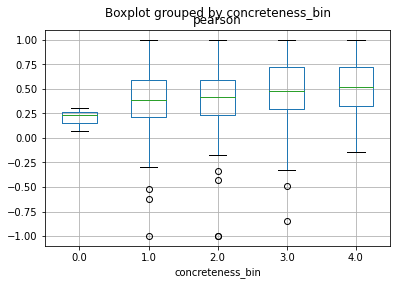


****************************************
*** Evaluating ../results/debug_semcor_analysis_model.plsr.mc_rae_real.allbuthomonyms.5k.100components.500max_iters model ***
****************************************


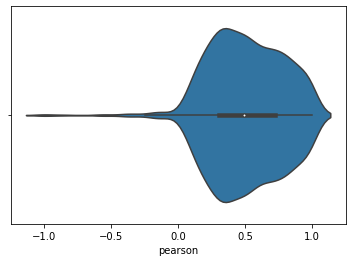

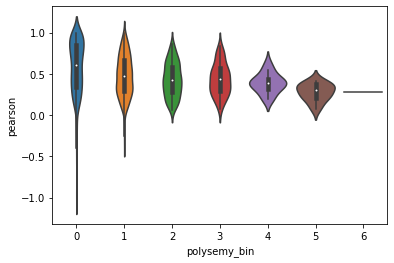

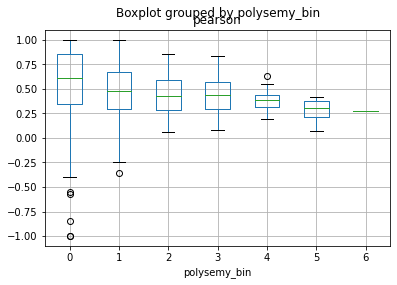

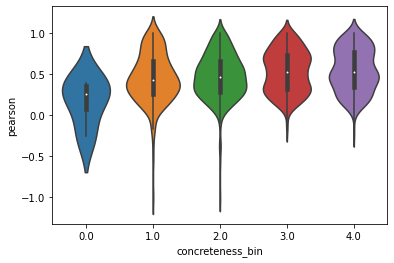

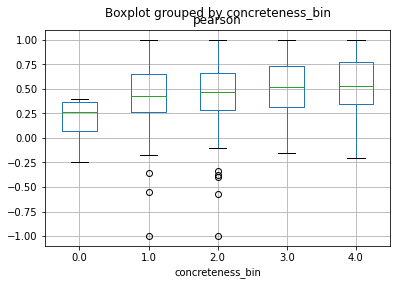


****************************************
*** Evaluating ../results/debug_semcor_analysis_model.plsr.mc_rae_real.allbuthomonyms.1k.50components.500max_iters model ***
****************************************


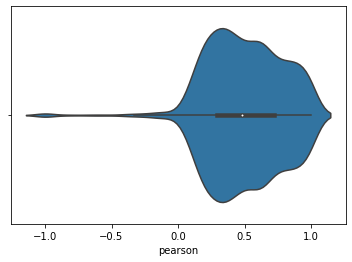

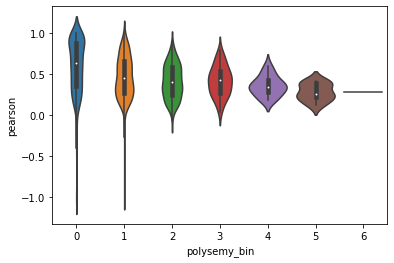

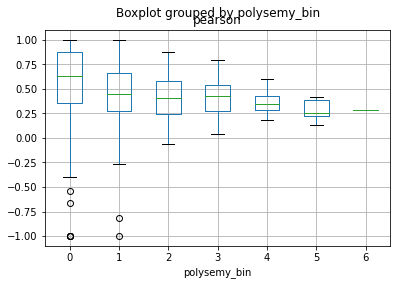

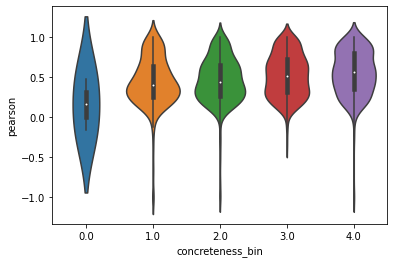

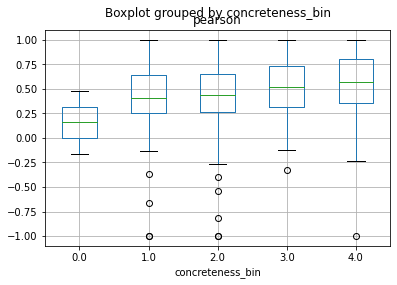


****************************************
*** Evaluating ../results/debug_semcor_analysis_model.ffnn.mc_rae_real.allbuthomonyms.5k.50epochs.0.5dropout.lr1e-4.hsize300 model ***
****************************************


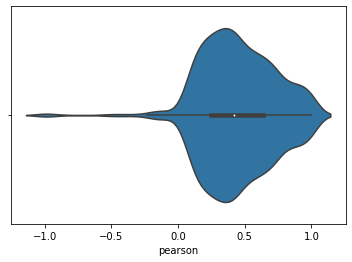

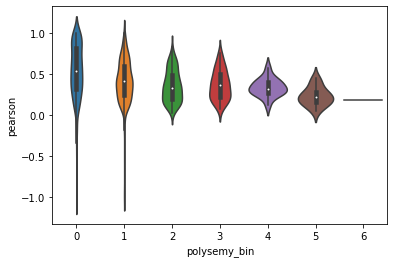

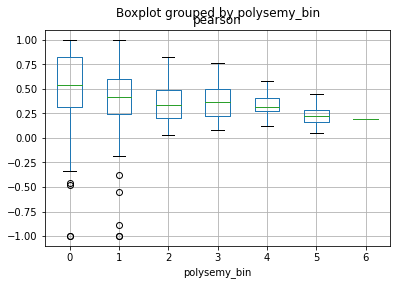

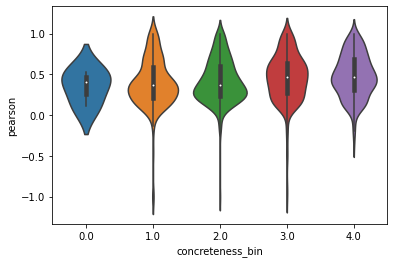

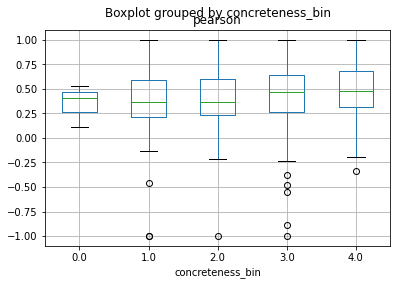


****************************************
*** Evaluating ../results/debug_semcor_analysis_model.ffnn.mc_rae_real.allbuthomonyms.1k.50epochs.0.5dropout.lr1e-4.hsize300 model ***
****************************************


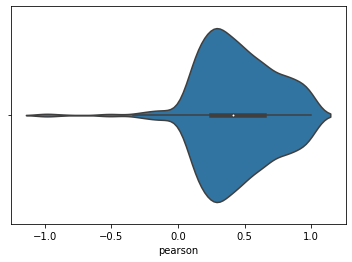

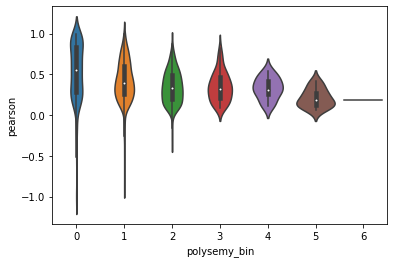

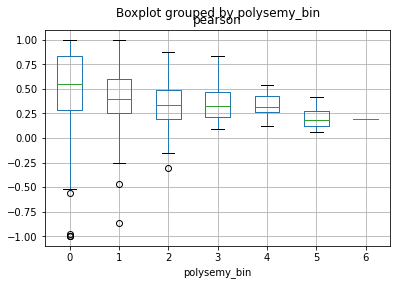

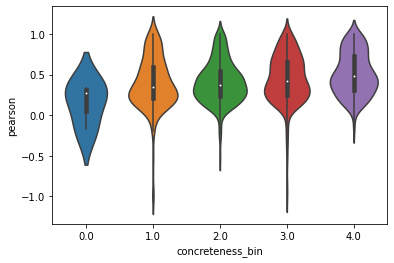

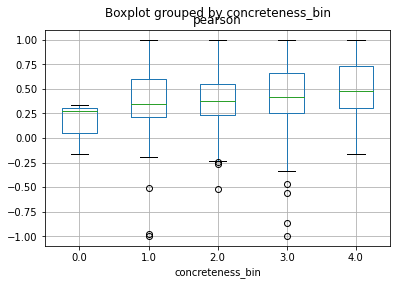


****************************************
*** Evaluating ../results/debug_semcor_analysis_model.ffnn.binder.5k.50epochs.0.5dropout.lr1e-4.hsize300 model ***
****************************************


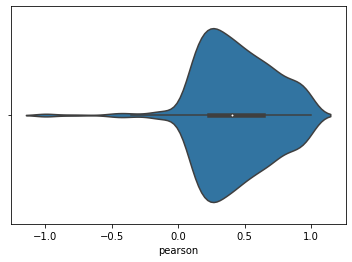

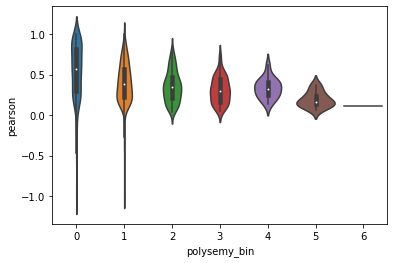

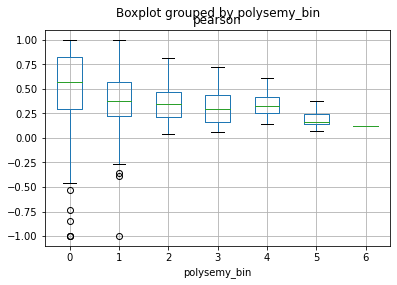

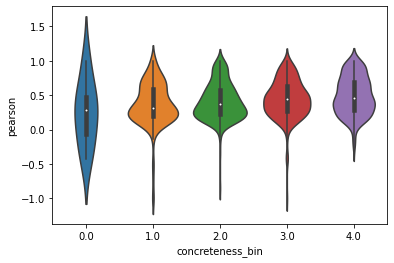

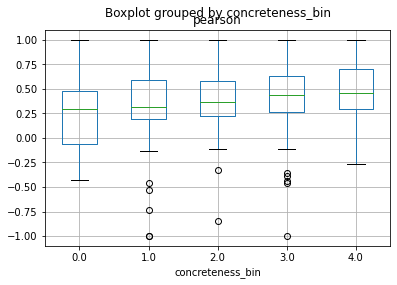


****************************************
*** Evaluating ../results/debug_semcor_analysis_model.ffnn.binder.1k.50epochs.0.5dropout.lr1e-4.hsize300 model ***
****************************************


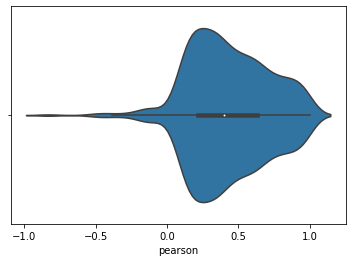

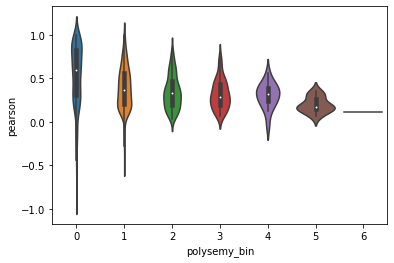

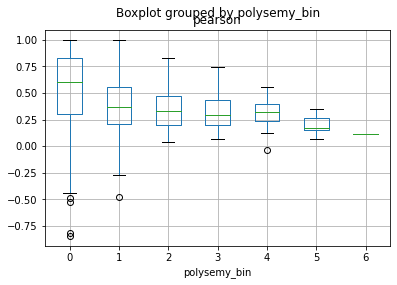

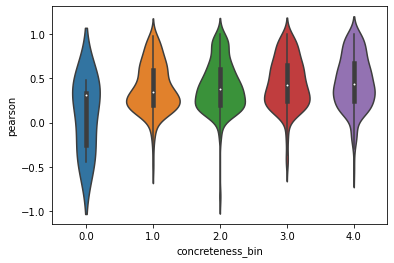

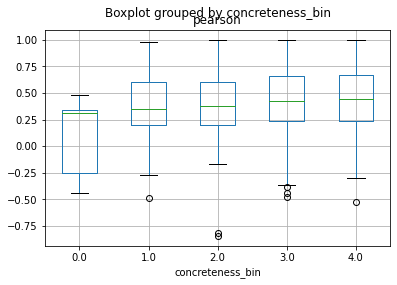


****************************************
*** Evaluating ../results/debug_semcor_analysis_model.plsr.binder.5k.30components.500max_iters model ***
****************************************


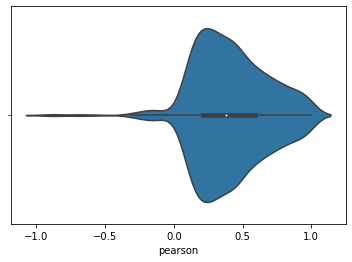

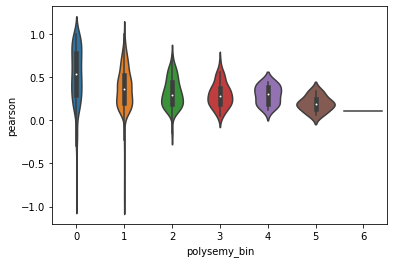

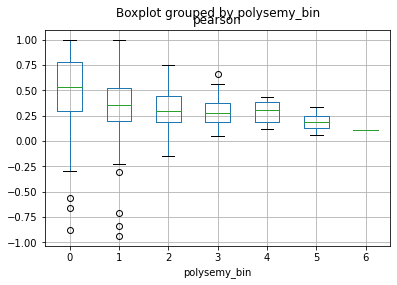

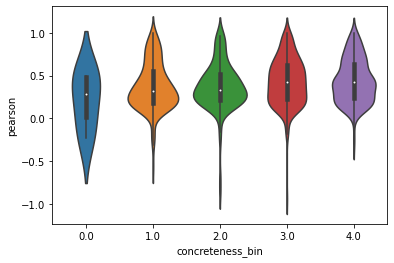

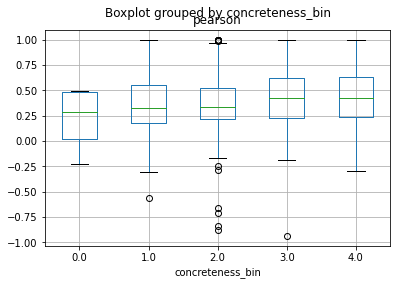


****************************************
*** Evaluating ../results/debug_semcor_analysis_model.plsr.binder.1k.30components.500max_iters model ***
****************************************


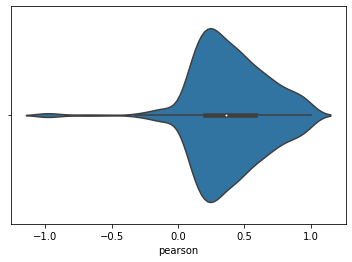

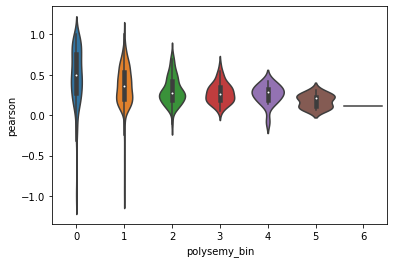

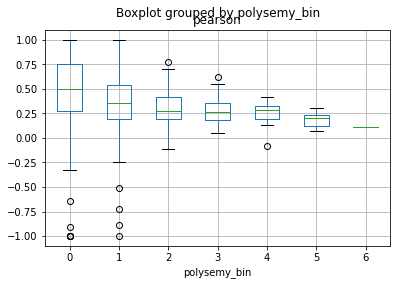

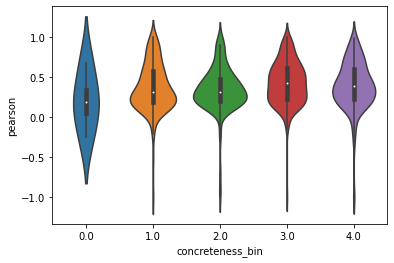

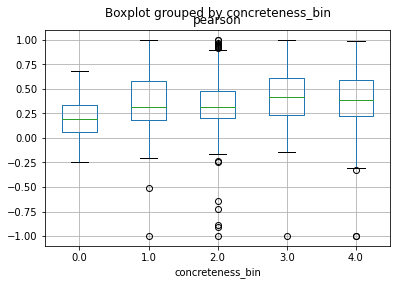

In [59]:
for save_path in models:
    df = pd.read_csv( save_path + '.csv')
    print("****************************************")
    print("*** Evaluating %s model ***" % save_path)
    print("****************************************")    
    analyze_data(df)
    print("")


In [65]:

print("****************************************")
print("*** Evaluating Average Correlation ***")
print("****************************************")  
for save_path in models:
    df = pd.read_csv(save_path + ".csv")
    print(save_path, average_correlation(df))


****************************************
*** Evaluating Average Correlation ***
****************************************
0.3328732205881422
2166
916219
../results/debug_semcor_analysis_model.plsr.buchanan.allbuthomonyms.5k.300components.500max_iters 0.3328732205881422
0.3274184647494593
2166
916219
../results/debug_semcor_analysis_model.plsr.buchanan.allbuthomonyms.1k.300components.500max_iters 0.3274184647494593
0.31074367493773125
2166
916219
../results/debug_semcor_analysis_model.ffnn.buchanan.allbuthomonyms.5k.50epochs.0.5dropout.lr1e-4.hsize300 0.31074367493773125
0.2943967612492942
2166
916219
../results/debug_semcor_analysis_model.ffnn.buchanan.allbuthomonyms.1k.50epochs.0.5dropout.lr1e-4.hsize300 0.2943967612492942
0.3236037231255748
2166
916219
../results/debug_semcor_analysis_model.plsr.mc_rae_real.allbuthomonyms.5k.100components.500max_iters 0.3236037231255748
0.3192158276838571
2166
916219
../results/debug_semcor_analysis_model.plsr.mc_rae_real.allbuthomonyms.1k.50component